# Binary Classification

- Binary classifcation is a supervised machine learning technique where the goal is to
predict categorical class lables which are discrete and unordered such as Pass/Fail, 
Positive/Negative, Default/Non default etc

In [1]:
from pycaret.datasets import get_data

In [2]:
dataset = get_data("credit")

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [3]:
dataset.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
23995,80000,1,2,2,34,2,2,2,2,2,...,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
23996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
23997,30000,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
23998,80000,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
23999,50000,1,2,1,46,0,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [4]:
dataset.shape

(24000, 24)

In [5]:
dataset.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [6]:
data = dataset.sample(frac=0.95, random_state=786)

In [7]:
data.shape

(22800, 24)

In [8]:
data_unseen = dataset.drop(data.index)

In [9]:
data_unseen.shape

(1200, 24)

In [11]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
20534,270000,2,1,2,34,0,0,2,0,0,...,44908.0,19508.0,15860.0,4025.0,5.0,34000.0,0.0,0.0,0.0,0
6885,160000,2,1,2,42,-2,-2,-2,-2,-2,...,0.0,741.0,0.0,0.0,0.0,0.0,741.0,0.0,0.0,0
1553,360000,2,1,2,30,0,0,0,0,0,...,146117.0,145884.0,147645.0,6000.0,6000.0,4818.0,5000.0,5000.0,4500.0,0
1952,20000,2,1,2,25,0,0,0,0,0,...,18964.0,19676.0,20116.0,1700.0,1300.0,662.0,1000.0,747.0,602.0,0
21422,70000,1,2,2,29,0,0,0,0,0,...,48538.0,49034.0,49689.0,2200.0,8808.0,2200.0,2000.0,2000.0,2300.0,0


In [12]:
data.reset_index(inplace=True, drop=True)

In [13]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,270000,2,1,2,34,0,0,2,0,0,...,44908.0,19508.0,15860.0,4025.0,5.0,34000.0,0.0,0.0,0.0,0
1,160000,2,1,2,42,-2,-2,-2,-2,-2,...,0.0,741.0,0.0,0.0,0.0,0.0,741.0,0.0,0.0,0
2,360000,2,1,2,30,0,0,0,0,0,...,146117.0,145884.0,147645.0,6000.0,6000.0,4818.0,5000.0,5000.0,4500.0,0
3,20000,2,1,2,25,0,0,0,0,0,...,18964.0,19676.0,20116.0,1700.0,1300.0,662.0,1000.0,747.0,602.0,0
4,70000,1,2,2,29,0,0,0,0,0,...,48538.0,49034.0,49689.0,2200.0,8808.0,2200.0,2000.0,2000.0,2300.0,0


In [14]:
data.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
22795,130000,1,3,2,45,0,0,-1,0,-1,...,1261.0,390.0,390.0,1000.0,2522.0,0.0,390.0,390.0,390.0,0
22796,290000,2,1,2,29,0,0,0,0,-1,...,-77.0,8123.0,210989.0,1690.0,3000.0,0.0,8200.0,205000.0,6000.0,0
22797,210000,1,2,1,41,1,2,0,0,0,...,69670.0,59502.0,119494.0,0.0,5000.0,3600.0,2000.0,2000.0,5000.0,0
22798,550000,1,2,1,47,0,0,0,0,0,...,30000.0,0.0,0.0,10000.0,20000.0,5000.0,0.0,0.0,0.0,0
22799,200000,1,1,2,28,0,0,0,0,0,...,161221.0,162438.0,157415.0,7000.0,8016.0,5000.0,12000.0,6000.0,7000.0,0


In [15]:
data_unseen.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
5,100000,2,2,2,23,0,-1,-1,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
39,380000,1,2,2,32,-1,-1,-1,-1,-1,...,32018.0,11849.0,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0
57,200000,2,2,1,32,-1,-1,-1,-1,2,...,5247.0,3848.0,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0
72,200000,1,1,1,53,2,2,2,2,2,...,144098.0,147124.0,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1
103,240000,1,1,2,41,1,-1,-1,0,0,...,3164.0,360.0,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0


In [16]:
data_unseen.reset_index(inplace=True, drop=True)

In [17]:
data_unseen.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,100000,2,2,2,23,0,-1,-1,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,32018.0,11849.0,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,5247.0,3848.0,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0
3,200000,1,1,1,53,2,2,2,2,2,...,144098.0,147124.0,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1
4,240000,1,1,2,41,1,-1,-1,0,0,...,3164.0,360.0,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0


In [18]:
data_unseen.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
1195,50000,1,2,1,37,1,2,2,2,0,...,2846.0,1585.0,1324.0,0.0,3000.0,0.0,0.0,1000.0,1000.0,1
1196,220000,1,2,1,41,0,0,-1,-1,-2,...,5924.0,1759.0,1824.0,8840.0,6643.0,5924.0,1759.0,1824.0,7022.0,0
1197,420000,1,1,2,34,0,0,0,0,0,...,141695.0,144839.0,147954.0,7000.0,7000.0,5500.0,5500.0,5600.0,5000.0,0
1198,90000,1,2,1,36,0,0,0,0,0,...,11328.0,12036.0,14329.0,1500.0,1500.0,1500.0,1200.0,2500.0,0.0,1
1199,50000,1,2,1,46,0,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [20]:
print("Data for Modeling:" + str(data.shape))
print("Unseen data for prediction:" + str(data_unseen.shape))

Data for Modeling:(22800, 24)
Unseen data for prediction:(1200, 24)


In [22]:
from pycaret.classification import *

In [23]:
clf01 = setup(data= data, target= "default", session_id=123)

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(22800, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [24]:
best_model = compare_models(sort= "Recall")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8254,0.0000,0.3637,0.6913,0.4764,0.3836,0.4122,0.0390
lda,Linear Discriminant Analysis,0.8247,0.7634,0.3755,0.6794,0.4835,0.3884,0.4132,0.3100
gbc,Gradient Boosting Classifier,0.8225,0.7790,0.3548,0.6800,0.4661,0.3721,0.4005,3.0560
ada,Ada Boost Classifier,0.8221,0.7697,0.3505,0.6811,0.4626,0.3690,0.3983,0.7850
catboost,CatBoost Classifier,0.8211,0.7756,0.3608,0.6685,0.4684,0.3723,0.3980,16.0780
lightgbm,Light Gradient Boosting Machine,0.8210,0.7750,0.3609,0.6679,0.4683,0.3721,0.3977,0.2880
rf,Random Forest Classifier,0.8180,0.7618,0.3591,0.6531,0.4631,0.3645,0.3884,1.0500
xgboost,Extreme Gradient Boosting,0.8160,0.7561,0.3629,0.6391,0.4626,0.3617,0.3829,2.4550
et,Extra Trees Classifier,0.8082,0.7381,0.3669,0.6010,0.4553,0.3471,0.3629,0.9740
lr,Logistic Regression,0.7814,0.6410,0.0003,0.1000,0.0006,0.0003,0.0034,1.1600


In [25]:
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


In [26]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [27]:
dt = create_model("dt")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7331,0.6239,0.4298,0.3979,0.4132,0.2408,0.2411
1,0.7325,0.6359,0.4642,0.4030,0.4314,0.2576,0.2587
2,0.7419,0.6254,0.4183,0.4113,0.4148,0.2492,0.2492
3,0.7256,0.6116,0.4097,0.3813,0.3950,0.2179,0.2181
4,0.7124,0.6127,0.4355,0.3671,0.3984,0.2113,0.2126
5,0.7193,0.6111,0.4155,0.3728,0.3930,0.2111,0.2116
6,0.7212,0.6098,0.4126,0.3750,0.3929,0.2125,0.2129
7,0.7287,0.5932,0.3524,0.3727,0.3623,0.1902,0.1903
8,0.7105,0.5898,0.3754,0.3493,0.3619,0.1750,0.1752
9,0.7373,0.6207,0.4138,0.4011,0.4074,0.2387,0.2387


In [28]:
knn = create_model("knn")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7469,0.6020,0.1920,0.3545,0.2491,0.1128,0.1204
1,0.7550,0.5894,0.2092,0.3883,0.2719,0.1402,0.1500
2,0.7506,0.5883,0.1576,0.3459,0.2165,0.0923,0.1024
3,0.7419,0.5818,0.1519,0.3136,0.2046,0.0723,0.0790
4,0.7563,0.5908,0.1490,0.3611,0.2110,0.0954,0.1085
5,0.7550,0.5997,0.1748,0.3720,0.2378,0.1139,0.1255
6,0.7638,0.5890,0.1891,0.4125,0.2593,0.1413,0.1565
7,0.7613,0.6240,0.1633,0.3904,0.2303,0.1163,0.1318
8,0.7619,0.5988,0.1862,0.4037,0.2549,0.1356,0.1500
9,0.7549,0.5756,0.1897,0.3771,0.2524,0.1246,0.1351


In [29]:
rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8114,0.7666,0.3467,0.6237,0.4457,0.3430,0.3645
1,0.8264,0.7527,0.3897,0.6800,0.4954,0.3998,0.4224
2,0.8258,0.7701,0.3496,0.7052,0.4674,0.3772,0.4104
3,0.8195,0.7662,0.3754,0.6517,0.4764,0.3768,0.3977
4,0.8177,0.7654,0.3524,0.6543,0.4581,0.3601,0.3851
5,0.8283,0.7750,0.3897,0.6904,0.4982,0.4041,0.4282
6,0.8076,0.7717,0.3352,0.6094,0.4325,0.3283,0.3495
7,0.8195,0.7401,0.3381,0.6743,0.4504,0.3564,0.3868
8,0.8095,0.7461,0.3582,0.6098,0.4513,0.3453,0.3632
9,0.8144,0.7643,0.3563,0.6327,0.4559,0.3544,0.3756


In [30]:
tuned_rf = tune_model(rf)
print(tuned_rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8158,0.7508,0.3181,0.6647,0.4302,0.3363,0.3689
1,0.8283,0.7675,0.3295,0.7419,0.4563,0.3719,0.4152
2,0.8139,0.7337,0.3181,0.6529,0.4277,0.3321,0.3628
3,0.8246,0.7588,0.3095,0.7347,0.4355,0.3514,0.3976
4,0.8170,0.7567,0.3438,0.6557,0.4511,0.3539,0.3805
5,0.8258,0.7513,0.3324,0.7205,0.4549,0.3676,0.4067
6,0.8170,0.7529,0.3324,0.6629,0.4427,0.3474,0.3771
7,0.8221,0.7507,0.3381,0.6901,0.4538,0.3621,0.3951
8,0.8177,0.7201,0.2980,0.6933,0.4168,0.3286,0.3699
9,0.8207,0.7484,0.3132,0.6987,0.4325,0.3439,0.3831


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


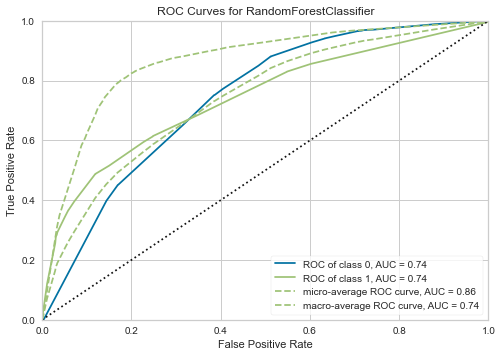

In [31]:
plot_model(tuned_rf, plot = "auc")

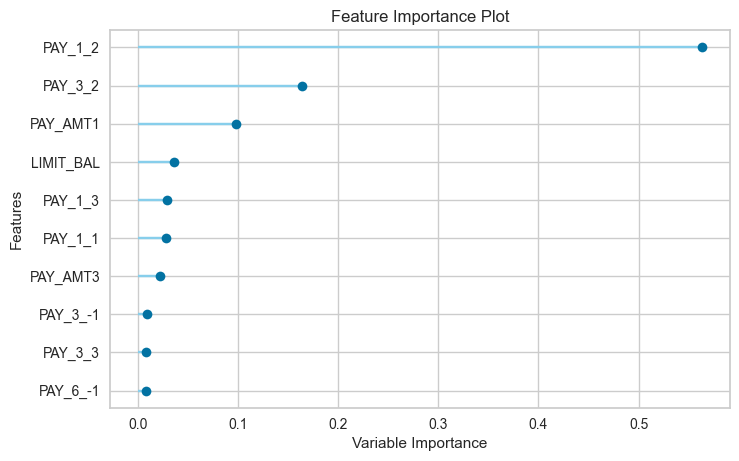

In [33]:
plot_model(tuned_rf, plot= "feature")

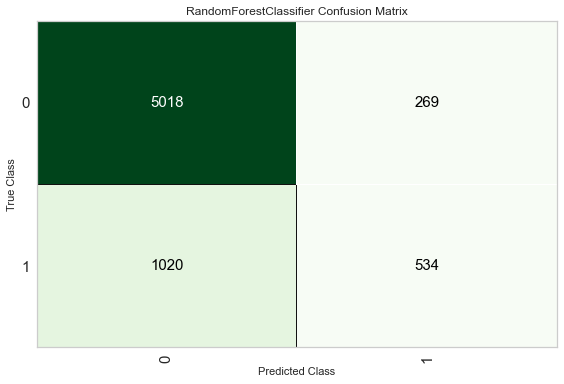

In [34]:
plot_model(tuned_rf, plot= "confusion_matrix")

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

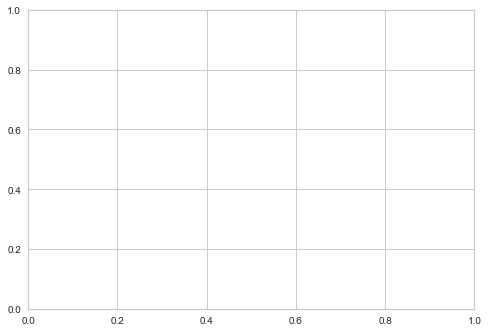

In [35]:
evaluate_model(tuned_rf)

In [37]:
predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8116,0.7407,0.3436,0.6650,0.4531,0.3530,0.3811


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default,Label,Score
0,80000.0,29.0,6228.0,589.0,390.0,390.0,390.0,383.0,589.0,390.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8452
1,180000.0,30.0,149069.0,152317.0,156282.0,161163.0,172190.0,148963.0,7500.0,8000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.9201
2,100000.0,26.0,18999.0,23699.0,9390.0,5781.0,8065.0,17277.0,5129.0,1227.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9201
3,500000.0,36.0,396.0,1043.0,19230.0,116696.0,194483.0,195454.0,1043.0,19230.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8452
4,190000.0,47.0,192493.0,193297.0,193400.0,193278.0,192956.0,193039.0,7200.0,7222.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6836,120000.0,44.0,75294.0,76465.0,74675.0,79629.0,77748.0,82497.0,3000.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.5649
6837,50000.0,26.0,47095.0,48085.0,49039.0,49662.0,0.0,0.0,2073.0,2027.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8394
6838,80000.0,39.0,46401.0,39456.0,30712.0,29629.0,28241.0,28030.0,1560.0,1421.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8452
6839,200000.0,33.0,50612.0,10537.0,5552.0,2506.0,9443.0,11818.0,10023.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7548


In [44]:
unseen_pred = predict_model(tuned_rf, data= data_unseen)

In [45]:
print(unseen_pred)

      LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0        100000    2          2         2   23      0     -1     -1      0   
1        380000    1          2         2   32     -1     -1     -1     -1   
2        200000    2          2         1   32     -1     -1     -1     -1   
3        200000    1          1         1   53      2      2      2      2   
4        240000    1          1         2   41      1     -1     -1      0   
...         ...  ...        ...       ...  ...    ...    ...    ...    ...   
1195      50000    1          2         1   37      1      2      2      2   
1196     220000    1          2         1   41      0      0     -1     -1   
1197     420000    1          1         2   34      0      0      0      0   
1198      90000    1          2         1   36      0      0      0      0   
1199      50000    1          2         1   46      0      0      0      0   

      PAY_5  ...  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_

In [46]:
from pycaret.utils import check_metric

In [48]:
check_metric(unseen_pred["default"], unseen_pred["Label"], metric= "Accuracy")

0.815